## Roman Molnár a Lukáš Novota

## % podiel - 50-50

## dataset č.63

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
filename1 = "63/other_train.csv"
df1 = pd.read_csv(filename1, sep=',')
df1.head()

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Raymond Goode,"10979 Jeffrey Trace\r\nThomastown, WY 01984",White,NaN,Tech-support,f,9.0,Not-in-family,-0.551845,...,NaN,NaN,0.0,52.774565,<=50K,"{'mean_oxygen':'2.220735786','std_oxygen':'13....",United-States,42.0,0.0,Private
1,1,Duane Rust,"172 James Underpass\r\nNorth Daniel, DE 77866",White,Married-civ-spouse,Sales,f,10.0,Husband,0.742840,...,Some-college,205724.0,0.0,51.763432,>50K,"{'mean_oxygen':'15.67809365','std_oxygen':'50....",United-States,24.0,0.0,Private
2,2,Willie Flowers,"403 Snow Spring Apt. 484\r\nJonathanview, NH 9...",White,Married-civ-spouse,Prof-specialty,f,16.0,Husband,0.618000,...,Doctorate,214627.0,1.0,46.480033,>50K,"{'mean_oxygen':'0.8486622070000001','std_oxyge...",United-States,60.0,0.0,Self-emp-inc
3,3,Joseph Brumleve,"8610 Marks Stravenue Apt. 073\r\nNew Michael, ...",White,Divorced,Craft-repair,f,10.0,Own-child,1.716127,...,Some-college,213179.0,0.0,39.304941,>50K,"{'mean_oxygen':'2.877926421','std_oxygen':'18....",United-States,40.0,0.0,Private
4,4,James Barwick,"04945 Rebecca Walks\r\nLake Brett, ND 86641",White,Separated,Other-service,f,4.0,Unmarried,1.183415,...,7th-8th,155701.0,0.0,39.307106,<=50K,"{'mean_oxygen':'1.746655518','std_oxygen':'16....",Peru,38.0,0.0,Private


In [3]:
filename2 = "63/personal_train.csv"
df2 = pd.read_csv(filename2, sep=',')
df2.head()
#v oboch datasetoch si hned vsimneme zbytocny prvy stlpec, ktory by asi mal znamenat nejake poradove cislo, 
#kedze ale mame poradove cislo kazdeho zaznamu mozeme ho odstranit

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",44,Male,1975-10-14
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",51,male,68-08-01
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",53,Male,1966-08-13
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",53,Male,1966-04-08 00 00 00
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",66,Female,1953-02-19


In [7]:
df2.describe()

,Unnamed: 0
count,3933.000000
mean,1966.000000
std,1135.503633
min,0.000000
25%,983.000000
50%,1966.000000
75%,2949.000000
max,3932.000000


In [15]:
df1.info()
#mozeme vididet pocet vstupov - 3983, pocet atributov - 22 a aj ich typy
#pocet vstupov v tomto datasete nesedi s poctom v druhom - skontrolujeme duplikaty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3983 non-null   int64  
 1   name              3983 non-null   object 
 2   address           3983 non-null   object 
 3   race              3972 non-null   object 
 4   marital-status    3970 non-null   object 
 5   occupation        3978 non-null   object 
 6   pregnant          3971 non-null   object 
 7   education-num     3964 non-null   float64
 8   relationship      3970 non-null   object 
 9   skewness_glucose  3973 non-null   float64
 10  mean_glucose      3573 non-null   float64
 11  capital-gain      3967 non-null   float64
 12  kurtosis_glucose  3960 non-null   float64
 13  education         3968 non-null   object 
 14  fnlwgt            3965 non-null   float64
 15  class             3968 non-null   float64
 16  std_glucose       3971 non-null   float64


In [16]:
df2.info()
#mozeme vididet pocet vstupov - 3933, pocet atributov - 5 a aj ich typy
#mozme si vsimnut aj to, ze atribut age, ktory by sme ocakavali, ze by bol reprezentovany ciselnou hodnotou je typu objekt - najskor chybne data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3933 non-null   int64 
 1   name           3933 non-null   object
 2   address        3933 non-null   object
 3   age            3681 non-null   object
 4   sex            3933 non-null   object
 5   date_of_birth  3933 non-null   object
dtypes: int64(1), object(5)
memory usage: 184.5+ KB


In [17]:
df1.isnull().sum()
#chyby v datach mozu byt sposobene ja chybajucimi datami - vo vacsine pripadov to nie je vysoke mnozstvo az na atribut 
#mean-glucose, kde chyba vyse 10% hodnot

Unnamed: 0            0
name                  0
address               0
race                 11
marital-status       13
occupation            5
pregnant             12
education-num        19
relationship         13
skewness_glucose     10
mean_glucose        410
capital-gain         16
kurtosis_glucose     23
education            15
fnlwgt               18
class                15
std_glucose          12
income               14
medical_info         13
native-country       16
hours-per-week       13
capital-loss         15
workclass            17
dtype: int64

In [18]:
df2.isnull().sum()
#rovnako aj tu v atribute age chyba odst velke mnozstvo dat
#chybajuci vek mozeme dopocitat z datumu narodenia

Unnamed: 0         0
name               0
address            0
age              252
sex                0
date_of_birth      0
dtype: int64

In [27]:
df1['marital-status'].unique()
#hodnoty vyzeraju dobre

array([nan, ' Married-civ-spouse', ' Divorced', ' Separated',
       ' Never-married', ' Widowed', ' Married-spouse-absent',
       ' Married-AF-spouse'], dtype=object)

In [41]:
df1['pregnant'].unique()
#vela hodnot na to ze clovek by ocakaval len 2 hodnoty
#tu upravime hodnoty, aby mohli mat len 2 hodnoty, a v pripade nan sa mozeme pozriet na pohlavie

array(['f', 'FALSE', 'F', 't', nan, 'TRUE', 'T'], dtype=object)

In [28]:
df1['relationship'].unique()
#hodnoty vyzeraju dobre

array([' Not-in-family', ' Husband', ' Own-child', ' Unmarried', ' Wife',
       ' Other-relative', nan], dtype=object)

In [29]:
df1.groupby('relationship').count()

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,skewness_glucose,mean_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
relationship,,,,,,,,,,,,,,,,,,,,,
Husband,1631,1631,1631,1628,1626,1630,1628,1623,1625,1462,...,1626,1622,1624,1628,1628,1631,1623,1628,1626,1628
Not-in-family,990,990,990,988,986,990,987,987,988,897,...,988,986,989,987,985,986,987,984,985,987
Other-relative,103,103,103,103,103,103,103,103,103,92,...,103,103,103,103,103,103,103,103,103,103
Own-child,627,627,627,624,625,625,624,625,627,556,...,625,625,626,626,626,623,624,626,626,625
Unmarried,432,432,432,431,432,430,431,427,430,391,...,429,431,428,429,430,430,432,430,431,428
Wife,187,187,187,187,187,187,187,187,187,165,...,187,186,187,186,186,186,187,187,187,187


In [35]:
df2['sex'].unique()
#tu vidime zbytocne rozdelenie kvoli velkym a malym pismenam
#tiez odstranime zbytocne viacere hodnoty female aj male bude napisane rovnako

array([' Male', 'male', ' Female', 'female'], dtype=object)

In [9]:
df2['age'].unique()
#mozme vidiet vela roznych hodnot, pricom vela z nich nedava ziadny zmysel - zaporne cisla a cisla vyse 1000, rovnako aj 
#dlhe retazce, ktore by mali asi reprezentovat chybajuce data
#kedze v pripade datumov narodenia nechybaju hodnoty mozme ich tu dopocitat, kedze v mnohych pripadoch nedavaju zmysel

array(['44', '51', '53', '66', '80', '61', '41', '48', '40', '52', '73',
       nan, '59', '-5600', '4000', '??', '60', '4500', '62', '70', '64',
       '-5900', '55', '50', '35', '43', '-4500', '45', '57', '27', '-1',
       '69', '34', '75', '63', '56', '58', '7800', '39', '33', '47', '65',
       '22', '54', '19', '3500', '2400', '67', '49', '-2500', '-7100',
       '38', '46', '-7300', '3700', '37', '68', '32', '81', '5000', '79',
       '90', '36', '77', '3200', '-6600', '7100', '42', '-3000', '78',
       '-3900', '23', '-2600', '9', '-3500', '16', '-4100', '5400', '29',
       '-4300', '31', '17', '4800', '-4900', '-9700', '20', '-4600',
       '-5700', '-5800', '71',
       '????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????',
       '113', '-5200', '74', '-5400', '-6400', '24', '-5300', '30', '76',
       '-6100', '4300', '-7000'

In [12]:
df2['date_of_birth']
#tu uz na par konkretnych pripadoch vidime, ze takmer kazdy datum ma odlisny typ zapisu
#bude potrebne upravit datumy na rovnaky typ zapisu - YYYY-MM-DD

0                1975-10-14
1                  68-08-01
2                1966-08-13
3       1966-04-08 00 00 00
4                1953-02-19
               ...         
3928    1964-06-21 00 00 00
3929    1986-02-09 00:00:00
3930             1960-09-04
3931             04/09/1965
3932             1976-01-20
Name: date_of_birth, Length: 3933, dtype: object

In [16]:
df1['address']

0             10979 Jeffrey Trace\r\nThomastown, WY 01984
1           172 James Underpass\r\nNorth Daniel, DE 77866
2       403 Snow Spring Apt. 484\r\nJonathanview, NH 9...
3       8610 Marks Stravenue Apt. 073\r\nNew Michael, ...
4             04945 Rebecca Walks\r\nLake Brett, ND 86641
                              ...                        
3978     9874 Sanchez Corner\r\nPort Javierbury, CA 90755
3979    0896 Samantha Hill Apt. 342\r\nAmandafort, CA ...
3980              223 Meyer Trace\r\nRachelview, NE 65834
3981                   Unit 0536 Box 1509\r\nDPO AA 59094
3982      7115 Snyder Key Apt. 041\r\nWest Tina, DE 78012
Name: address, Length: 3983, dtype: object

In [17]:
df2['address']
#v oboch pripadoch vidime ze uprostred adresy medzi ulicou sa mestom sa nachadza \r\n - novy riadok, chybny zapis
#dane \r\n odstranime, aby pri naslednom zapise dat nevzikali zbytocne nove riadky

0       7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...
1       391 Ball Road Suite 961\r\nFlowersborough, IN ...
2          8702 Vincent Square\r\nNew Jerryfurt, CO 30614
3          2751 Harris Crossroad\r\nWest Ashley, CA 30311
4       904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...
                              ...                        
3928               8582 Lee Roads\r\nCostaburgh, SC 21897
3929    68430 Erik Terrace Suite 279\r\nPort Adamborou...
3930                   Unit 8416 Box 3801\r\nDPO AE 31166
3931     34420 Brian Stream\r\nLake Michaeltown, MS 01832
3932                   Unit 7931 Box 0601\r\nDPO AE 50505
Name: address, Length: 3933, dtype: object

In [21]:
df1['medical_info']
#zdravotne hodnoty obsahuju informacie o kysliku pacienta, ale maju zly tvar
#dane hodnoty rozhadzeme do samostatnych stlpcov, z ktorych bude mozne s nimi dalej pracovat

0       {'mean_oxygen':'2.220735786','std_oxygen':'13....
1       {'mean_oxygen':'15.67809365','std_oxygen':'50....
2       {'mean_oxygen':'0.8486622070000001','std_oxyge...
3       {'mean_oxygen':'2.877926421','std_oxygen':'18....
4       {'mean_oxygen':'1.746655518','std_oxygen':'16....
                              ...                        
3978    {'mean_oxygen':'1.883779264','std_oxygen':'15....
3979    {'mean_oxygen':'6.010033445','std_oxygen':'30....
3980    {'mean_oxygen':'146.75','std_oxygen':'65.58762...
3981    {'mean_oxygen':'2.256688963','std_oxygen':'12....
3982    {'mean_oxygen':'3.413879599','std_oxygen':'25....
Name: medical_info, Length: 3983, dtype: object

In [22]:
df1['medical_info'][0]
#tu vidime, ze medical_info obsahuje rovnake informacie o kysliku ake su informacie o glukoze, akurat su vsetky spojene
#do jedneho pola, a v takomto pripade je narocne s tymito informaciami dalej pracovat

"{'mean_oxygen':'2.220735786','std_oxygen':'13.20426497','kurtosis_oxygen':'9.953692104','skewness_oxygen':'139.46687230000003'}"

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'skewness_glucose'}>],
       [<AxesSubplot:title={'center':'mean_glucose'}>,
        <AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'kurtosis_glucose'}>],
       [<AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'std_glucose'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>,
        <AxesSubplot:title={'center':'capital-loss'}>, <AxesSubplot:>]],
      dtype=object)

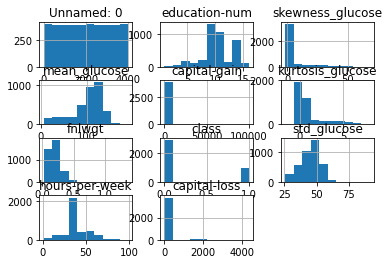

In [44]:
df1.hist()

<AxesSubplot:>

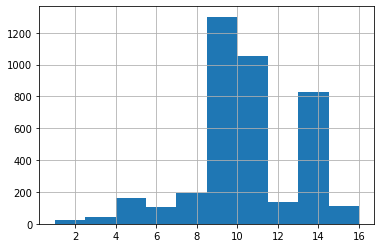

In [45]:
df1['education-num'].hist()

<AxesSubplot:>

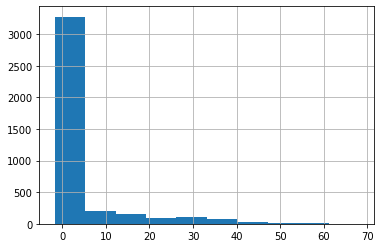

In [56]:
df1['skewness_glucose'].hist()

<AxesSubplot:xlabel='skewness_glucose', ylabel='Count'>

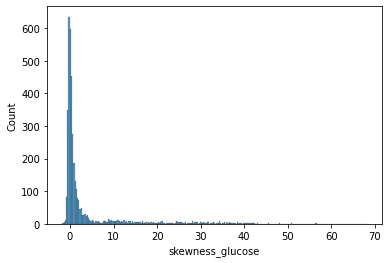

In [78]:
sns.histplot(df1['skewness_glucose'])

<AxesSubplot:>

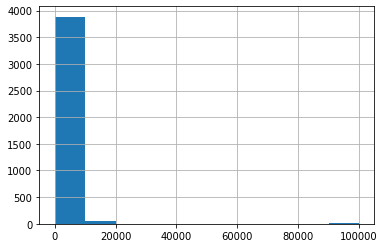

In [71]:
df1['capital-gain'].hist()


<AxesSubplot:>

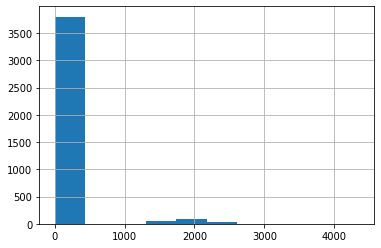

In [70]:
df1['capital-loss'].hist()

<AxesSubplot:xlabel='hours-per-week'>

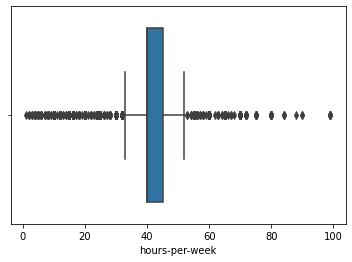

In [73]:
sns.boxplot(data=df1, x="hours-per-week")

<AxesSubplot:xlabel='mean_glucose', ylabel='Count'>

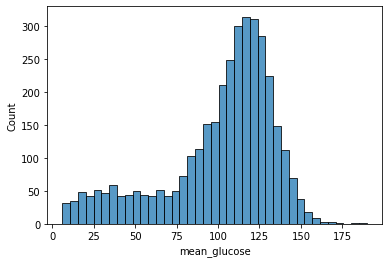

In [76]:
sns.histplot(df1['mean_glucose'])

<AxesSubplot:xlabel='std_glucose', ylabel='Count'>

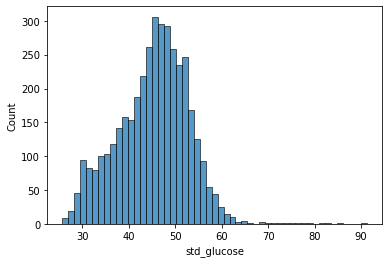

In [77]:
sns.histplot(df1['std_glucose'])

<AxesSubplot:xlabel='kurtosis_glucose', ylabel='Count'>

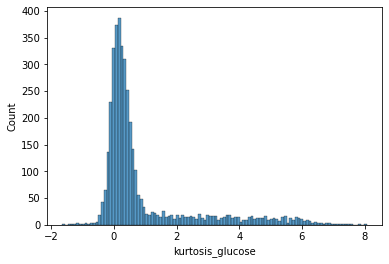

In [75]:
sns.histplot(df1['kurtosis_glucose'])

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

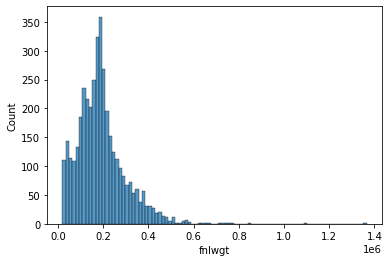

In [79]:
sns.histplot(df1['fnlwgt'])

<AxesSubplot:>

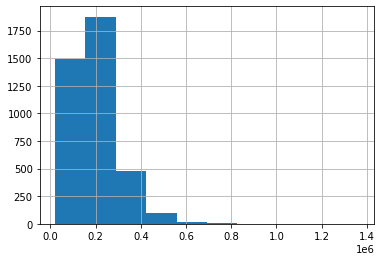

In [74]:
df1['fnlwgt'].hist()

## Párová analýza dát

In [6]:
df1.corr()

,Unnamed: 0,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss
Unnamed: 0,1.000000,0.011471,-0.028580,0.033854,-0.014550,-0.029149,0.025605,-0.023289,0.039336,-0.009369,-0.007694
education-num,0.011471,1.000000,0.032371,-0.031860,0.112220,0.032506,-0.030727,0.029418,-0.015107,0.155274,0.078087
skewness_glucose,-0.028580,0.032371,1.000000,-0.825601,-0.004101,0.962128,0.005018,0.683002,-0.667670,0.014927,0.002027
mean_glucose,0.033854,-0.031860,-0.825601,1.000000,-0.004203,-0.925940,-0.010201,-0.775335,0.643029,-0.021189,0.008544
capital-gain,-0.014550,0.112220,-0.004101,-0.004203,1.000000,-0.003094,-0.002610,-0.004868,-0.005955,0.074469,-0.028848
kurtosis_glucose,-0.029149,0.032506,0.962128,-0.925940,-0.003094,1.000000,0.010269,0.788995,-0.653904,0.016595,0.003059
fnlwgt,0.025605,-0.030727,0.005018,-0.010201,-0.002610,0.010269,1.000000,0.009251,-0.018510,-0.032616,-0.005985
class,-0.023289,0.029418,0.683002,-0.775335,-0.004868,0.788995,0.009251,1.000000,-0.502612,0.013677,0.010752
std_glucose,0.039336,-0.015107,-0.667670,0.643029,-0.005955,-0.653904,-0.018510,-0.502612,1.000000,-0.024282,0.024423
hours-per-week,-0.009369,0.155274,0.014927,-0.021189,0.074469,0.016595,-0.032616,0.013677,-0.024282,1.000000,0.071431


<AxesSubplot:xlabel='skewness_glucose', ylabel='kurtosis_glucose'>

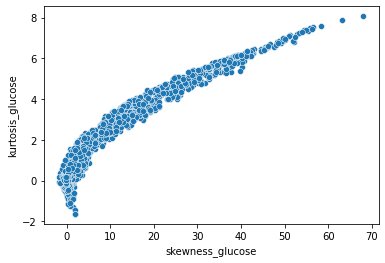

In [7]:
# Podľa tabuľky sme zistili, že najvyššia korelácia je medzi skewness_glucose a kurtosis_glucose - 0.962. Tu ide o silnú
# pozitívnu koreláciu.
sns.scatterplot(data=df1, x='skewness_glucose', y='kurtosis_glucose')

<AxesSubplot:xlabel='mean_glucose', ylabel='kurtosis_glucose'>

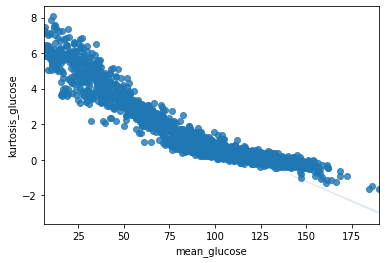

In [16]:
# Silná negatívna korelácia sa nachádza pri mean_glucose a kurtosis_glucose - -0.925.
sns.regplot(x="mean_glucose", y="kurtosis_glucose", data=df1)

<AxesSubplot:xlabel='class', ylabel='kurtosis_glucose'>

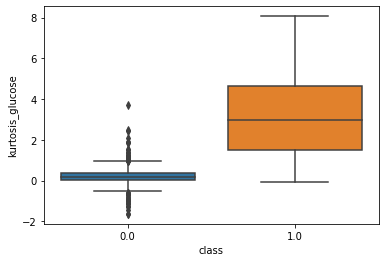

In [28]:
# Pri tejto dvojici atribútov napríklad môžeme vidieť, že ľudia s chorobou majú vyššiu hodnotou kurtosis_glucose.
sns.boxplot(data=df1, x="class", y="kurtosis_glucose")

In [20]:
# Počty ľudí bez choroby a s chorobou.
df1['class'].value_counts()

0.0    2950
1.0    1018
Name: class, dtype: int64

<AxesSubplot:xlabel='race'>

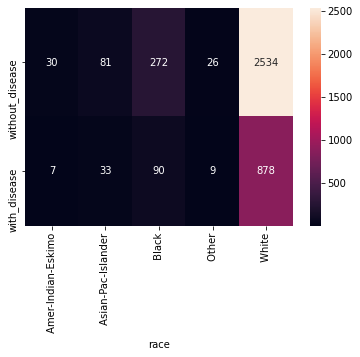

In [26]:
# Heatmap, ktorá ukazuje, koľko ľudí a akej rasy má alebo nemá chorobu.
disease_class = pd.crosstab(index=df1["class"], 
                             columns=df1["race"])
disease_class.index= ["without_disease","with_disease"]
sns.heatmap(disease_class, annot=True, fmt="d")

## Formulácia a štatistické overenie hypotéz o dátach 
### 1. hypotéza
**H0**: Pacienti s chorobou majú v priemere rovnakú hodnotu kurtosis_glucose ako pacienti bez danej choroby.<br>
**HA**: Pacienti s chorobou majú v priemere väčšiu/menšiu hodnotu kurtosis_glucose ako pacienti bez danej choroby.<br>

Na základe vizuálneho porovnania v predošlej časti, kde sme mali boxplot, ktorý opisoval práve túto situáciu, vidíme, že tam nejaký rozdiel je. Cheme overiť, či je tento rozdiel značný, tak neskôr to overíme štatistickým testom. Keďže ide o dve nezávislé skupiny, použijeme t-test alebo Mann-Whitenyho U-test. Najskôr musíme zistiť, či dáta pochádzajú z normálnych distribúcií.

In [4]:
# Najskôr zistíme hodnoty pre pacientov s chorobou.
class1 = df1.loc[df1['class'] == 1.0, 'kurtosis_glucose']

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_glucose', ylabel='Density'>

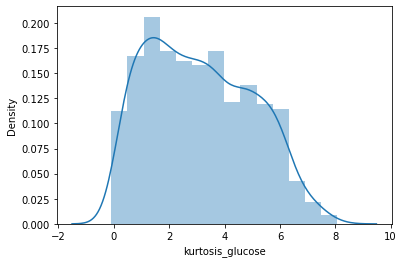

In [15]:
# Vykreslíme si histogram na zistenie normálnosti rozdelenie. Už podľa tohto grafu vidíme, že pravdepodobne nejde 
# o normálnu distribúciu.
sns.distplot(class1)

In [6]:
# Funkcia, ktorá nám slúži na identifikáciu vychýlených hodnôt. Ak sa vo vzorke nachádzajú nejaké vychýlené dáta, dáme ich preč.
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [16]:
import scipy.stats as stats

# Pre zistenie normálnosti rozdelenia použijeme taktiež Shapiro-Wilkov test normálnosti. Použijeme vzorku 100 hodnôt.
class1 = class1.dropna()
class1_out = identify_outliers(class1)
class1 = class1.drop(class1_out.index)

stats.shapiro(class1[:100])

ShapiroResult(statistic=0.957494854927063, pvalue=0.00267603131942451)

Ak je p < 0.05, H0 zamietame - dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia.<br>
Ak je p > 0.05, H0 nezamietame - dáta pravdepodobne pochádzajú z normálneho rozdelenia.

Pri prvom teste nám vyšla hodnota p < 0.05, takže dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia.

In [17]:
# Použijeme rovnaký postup. Najskôr zistíme hodnoty pre pacientov bez choroby.
class0 = df1.loc[df1['class'] == 0.0, 'kurtosis_glucose']

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_glucose', ylabel='Density'>

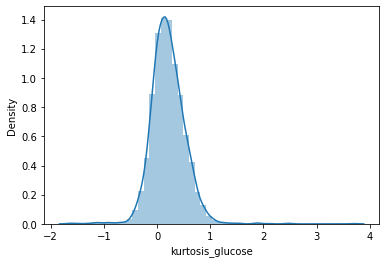

In [18]:
# Vykreslíme si histogram. Tu to vyzerá, že by dáta mohli pochádzať z normálneho rozdelenia, no nachádza sa tu veľa
# vychýlených hodnôt.
sns.distplot(class0)

In [19]:
# Shapiro-Wilkov test - taktiež vzorka 100 hodnôt.
class0 = class0.dropna()
class0_out = identify_outliers(class0)
class0 = class0.drop(class0_out.index)

stats.shapiro(class0[:100])

ShapiroResult(statistic=0.9858771562576294, pvalue=0.3666383624076843)

Tu máme hodnotu p > 0.05, takže tieto dáta pravdepodobne pochádzajú z normálneho rozdelenia. <br>
 
Na základe výsledkov z testov teda vieme, že class1 nepochádza z normálneho rozdelenia a class0 áno - nebol splnený predpoklad pre t-test. Použijeme teda neparametrický test - Mann-Whitneyho U-test.

In [23]:
# Mann-Whitneyho U-test. Znova použijeme vzorku 100 hodnôt.
stats.mannwhitneyu(class1[:100], class0[:100])

MannwhitneyuResult(statistic=334.0, pvalue=2.0994785970800087e-30)

Podľa testu vidíme, že nám vyšla p < 0.001, našu **H0** teda zamietame v prospech **HA**.

### 2. hypotéza
**H0**: Pacienti bez choroby majú v priemere rovnakú hodnotu mean_glucose ako pacienti s danou chorobou.<br>
**HA**: Pacienti bez choroby majú v priemere väčšiu/menšiu hodnotu mean_glucose ako pacienti s danou chorobou.<br>

Zvolíme úplne rovnaký postup ako pri 1. hypotéze.

<AxesSubplot:xlabel='class', ylabel='mean_glucose'>

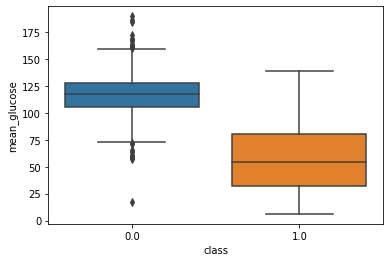

In [42]:
# Vizualizácia rozdielu mean_glucose pri pacientoch s chorobou a bez choroby.
sns.boxplot(data=df1, x="class", y="mean_glucose")

In [24]:
# Hodnoty pacientov bez choroby.
class0_m = df1.loc[df1['class'] == 0.0, 'mean_glucose']

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

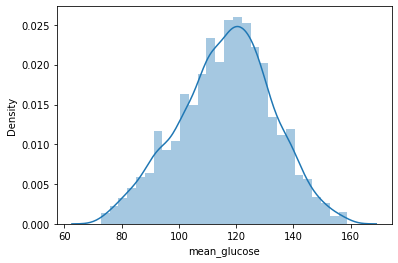

In [27]:
# Histogram - vidíme, že pravdepodobne dáta pochádzajú z normálneho rozdelenia.
sns.distplot(class0_m)

In [28]:
# Shapiro-Wilkov test. Znova použijeme vzorku 100 hodnôt.
class0_m = class0_m.dropna()
class0_m_out = identify_outliers(class0_m)
class0_m = class0_m.drop(class0_m_out.index)

stats.shapiro(class0_m[:100])

ShapiroResult(statistic=0.982296347618103, pvalue=0.19987468421459198)

Máme p > 0.05, takže H0 nezamietame - dáta pravdepodobne pochádzajú z normálneho rozdelenia.

In [29]:
# Hodnoty pacientov s chorobou
class1_m = df1.loc[df1['class'] == 1.0, 'mean_glucose']

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

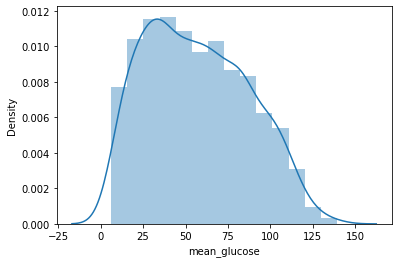

In [59]:
# Histogram pre pacientov s chorobou - podľa krivky vidíme, že pravdepodobne nepôjde o normálne rozdelenie.
sns.distplot(class1_m)

In [30]:
# Shapiro-Wilkov test - vzorka 100 hodnôt.
class1_m = class1_m.dropna()
class1_m_out = identify_outliers(class1_m)
class1_m = class1_m.drop(class1_m_out.index)

stats.shapiro(class1_m[:100])

ShapiroResult(statistic=0.956812858581543, pvalue=0.0023985295556485653)

Tu podľa testu vidíme, že p < 0.05, takže H0 zamietame a dáta pravdepodobne nepochádzajú z normálneho rozdelenia. <br>
Znova teda nebol splnený predpoklad pre t-test. Ako pri prvej hypotéze, volíme Mann-Whitneyho U-test.

In [32]:
# Mann-Whitneyho test so vzorkami 100 hodnôť.
stats.mannwhitneyu(class0_m[:100], class1_m[:100])

MannwhitneyuResult(statistic=535.0, pvalue=5.2479108633825635e-28)

Rovnako ako pri 1. hypotéze, p < 0.001, takže našu **H0** zamietame v prospech **HA**.